## OCR on MNIST Dataset

In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

Using TensorFlow backend.


# Prepare Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.max(x_train))  # highest intensity of pixels - grayscale
print(np.min(x_train))
print(np.max(x_test))  
print(np.min(x_test))


(60000, 28, 28)
(10000, 28, 28)
(10000,)
255
0
255
0


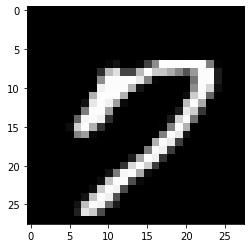

7


In [4]:
# Random sample
rand_num = np.random.randint(60000)
# plot 
plt.imshow(x_train[rand_num], cmap='gray')
plt.show()
# print label
print(y_train[rand_num])

In [5]:
# flatten the 2D img
x_train = np.reshape(x_train, [-1, 28*28])  # we want 784 samples
x_test = np.reshape(x_test,[-1, 28*28])

In [6]:
# normalize data
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

In [7]:
# one hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define Model
2 hidden layers
relu activation
512 neurson
fully_connected

second 
relu activation
512 neurson
fully_connected

output - fully connected
softmax

In [21]:
# model layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
# obtain metrics
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
            metrics=['accuracy'])
          


In [22]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=10, batch_size=100, verbose=0)
score = model.evaluate(x_test, y_test, batch_size=100, verbose=0)

In [23]:
score

[0.08679861331565916, 0.9801000046730042]

In [24]:
# print review of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


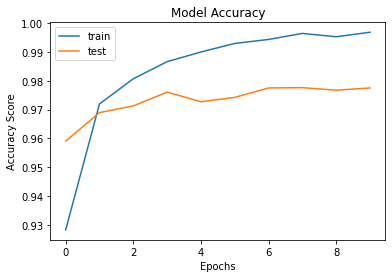

In [25]:
print(history.history.keys())
# plot the model
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

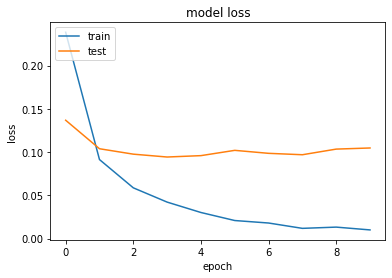

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Saving model
model.save('raw_model.h5')